In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
import os

df = pd.read_csv('Data/mxmh_survey_results.csv')

In [2]:
# Data is retrieved from https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results/data
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [4]:
df.shape

(736, 33)

In [5]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [6]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Timestamp: ['8/27/2022 19:29:02' '8/27/2022 19:57:31' '8/27/2022 21:28:18'
 '8/27/2022 21:40:40' '8/27/2022 21:54:47' '8/27/2022 21:56:50'
 '8/27/2022 22:00:29' '8/27/2022 22:18:59' '8/27/2022 22:33:05'
 '8/27/2022 22:44:03' '8/27/2022 22:51:15' '8/27/2022 23:00:32'
 '8/27/2022 23:04:00' '8/27/2022 23:12:03' '8/27/2022 23:16:06'
 '8/27/2022 23:19:52' '8/27/2022 23:39:41' '8/27/2022 23:39:49'
 '8/27/2022 23:40:55' '8/27/2022 23:41:36' '8/27/2022 23:43:06'
 '8/28/2022 0:28:02' '8/28/2022 1:39:02' '8/28/2022 3:19:08'
 '8/28/2022 4:13:11' '8/28/2022 4:38:14' '8/28/2022 4:40:36'
 '8/28/2022 5:05:51' '8/28/2022 5:16:30' '8/28/2022 8:36:27'
 '8/28/2022 10:30:22' '8/28/2022 10:38:05' '8/28/2022 10:54:30'
 '8/28/2022 10:59:53' '8/28/2022 11:08:51' '8/28/2022 11:13:25'
 '8/28/2022 11:25:49' '8/28/2022 11:27:15' '8/28/2022 11:36:35'
 '8/28/2022 11:39:21' '8/28/2022 11:50:31' '8/28/2022 11:54:45'
 '8/28/2022 11:55:54' '8/28/2022 11:58:48' '8/28/2022 12:08:29'
 '8/28/2022 12:12:35' '8/28/2022 12:15

In [7]:
# Preprocess the data
df.drop('Timestamp', axis=1, inplace=True)
df = df[df['Age'] <= 23]
df.dropna(inplace=True)

df.replace({'Never': 1, 'Rarely':2, 'Sometimes': 3, 'Very frequently': 4,
            'Yes': 1, 'No': 0,        
            }, inplace=True)
df['Music effects'].replace({
    'Worsen': -1, 'No effect': 0, 'Improve': 1
}, inplace=True)

genre_to_num = {'Latin': 1, 'Rock': 2, 'Video game music': 3, 'Jazz': 4, 'R&B': 5, 'K pop': 6, 'Country': 7, 'EDM': 8,
 'Hip hop': 9, 'Pop': 10, 'Rap': 11, 'Classical': 12, 'Metal': 13, 'Folk': 14, 'Lofi': 15, 'Gospel': 16}
num_to_genre = {v: k for k, v in genre_to_num.items()}
df['Fav genre'].replace(genre_to_num, inplace=True)


rating_to_label = {
    0: 'Low', 1: 'Low', 2: 'Low', 3: 'Low', 3.5: 'Low',
    4: 'Moderate', 5: 'Moderate', 5.5: 'Moderate', 6: 'Moderate', 
    7: 'High', 7.5: 'High', 8: 'High', 8.5: 'High', 9: 'High', 10: 'High'
}
df['Anxiety_label'] = df['Anxiety'].replace(rating_to_label)
df['Depression_label'] = df['Depression'].replace(rating_to_label)
df['Insomnia_label'] = df['Insomnia'].replace(rating_to_label)
df['OCD_label'] = df['OCD'].replace(rating_to_label)

In [8]:
df.isnull().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [9]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Age: [18. 21. 19. 16. 17. 15. 14. 20. 23. 22. 13. 10. 12.]
Primary streaming service: ['Spotify' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' 'Pandora']
Hours per day: [ 4.   5.   3.   1.   6.   8.   2.  12.  24.   7.   0.5 10.   2.5  0.7
  1.5 16.  15.   0.   9.  11.  18. ]
While working: [0 1]
Instrumentalist: [0 1]
Composer: [0 1]
Fav genre: [ 3  5  4  6  2  8  7  9 11 10 12 13 14 15 16  1]
Exploratory: [0 1]
Foreign languages: [1 0]
BPM: [1.32000000e+02 1.07000000e+02 8.60000000e+01 6.60000000e+01
 9.50000000e+01 9.40000000e+01 1.55000000e+02 1.25000000e+02
 8.80000000e+01 1.48000000e+02 1.03000000e+02 1.20000000e+02
 9.90000000e+01 1.18000000e+02 7.90000000e+01 8.40000000e+01
 1.69000000e+02 1.36000000e+02 1.01000000e+02 1.26000000e+02
 1.83000000e+02 1.42000000e+02 7.50000000e+01 8.90000000e+01
 1.61000000e+02 8.00000000e+01 1.30000000e+02 7.70000000e+01
 1.57000000e+02 9.00000000e+01 1.28000000e+02 1.40000000e+02
 9.60000000e+01 9.

In [10]:
df.describe()

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,3.980000e+02,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,18.565327,3.898744,0.824121,0.369347,0.190955,7.615578,0.773869,0.580402,2.512685e+06,2.258794,...,3.155779,2.331658,2.522613,2.944724,2.361809,6.089196,4.861809,3.707286,2.829146,0.758794
std,2.539264,3.096398,0.381197,0.483235,0.393548,4.128961,0.418851,0.494114,5.012546e+07,0.999174,...,0.936715,1.106679,1.082604,1.109592,1.038187,2.613221,2.937167,3.089818,2.868610,0.483595
min,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000e+01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,17.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,9.900000e+01,1.000000,...,3.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000
50%,18.000000,3.000000,1.000000,0.000000,0.000000,8.000000,1.000000,1.000000,1.200000e+02,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,7.000000,5.000000,3.000000,2.000000,1.000000
75%,21.000000,5.000000,1.000000,1.000000,0.000000,11.000000,1.000000,1.000000,1.407500e+02,3.000000,...,4.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,6.000000,5.000000,1.000000
max,23.000000,24.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000e+09,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,10.000000,10.000000,10.000000,10.000000,1.000000


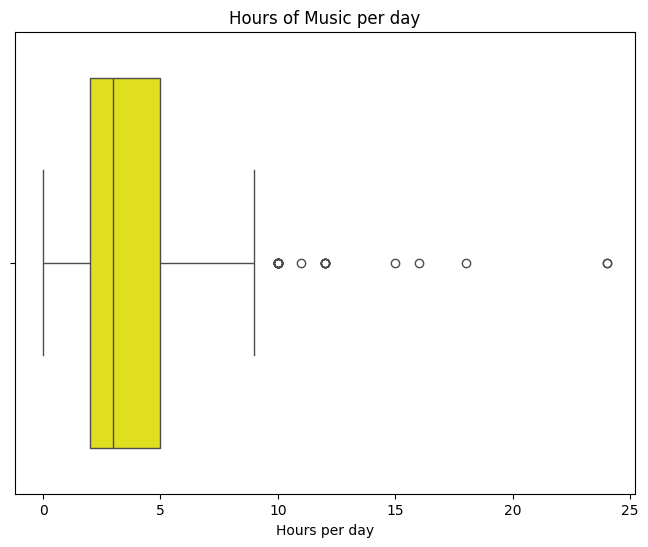

/var/folders/ty/y4xvm4r16qg653znp8pq00bw0000gn/T/ipykernel_49914/522846728.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hours per day'], kde=True, hist=True, color='red')


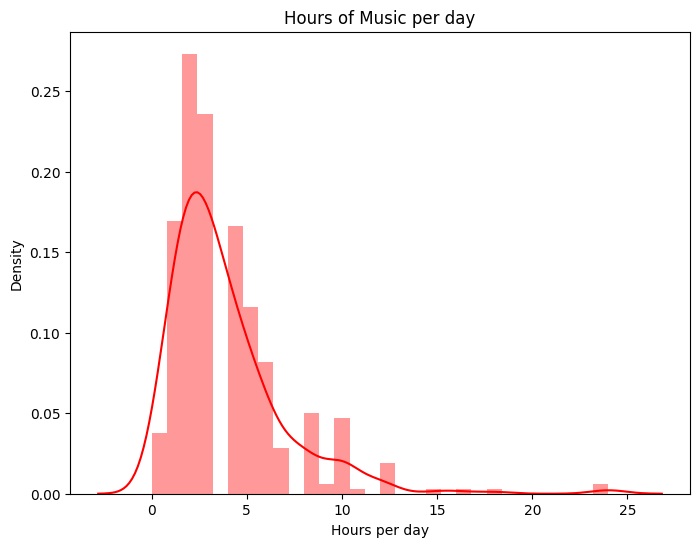

In [11]:
# Box and whisker plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Hours per day', color='yellow')
plt.title('Hours of Music per day')
plt.xlabel('Hours per day')
plt.show()

# Histogram with a curve
plt.figure(figsize=(8, 6))
sns.distplot(df['Hours per day'], kde=True, hist=True, color='red')
plt.title('Hours of Music per day')
plt.xlabel('Hours per day')
plt.ylabel('Density')
plt.show()


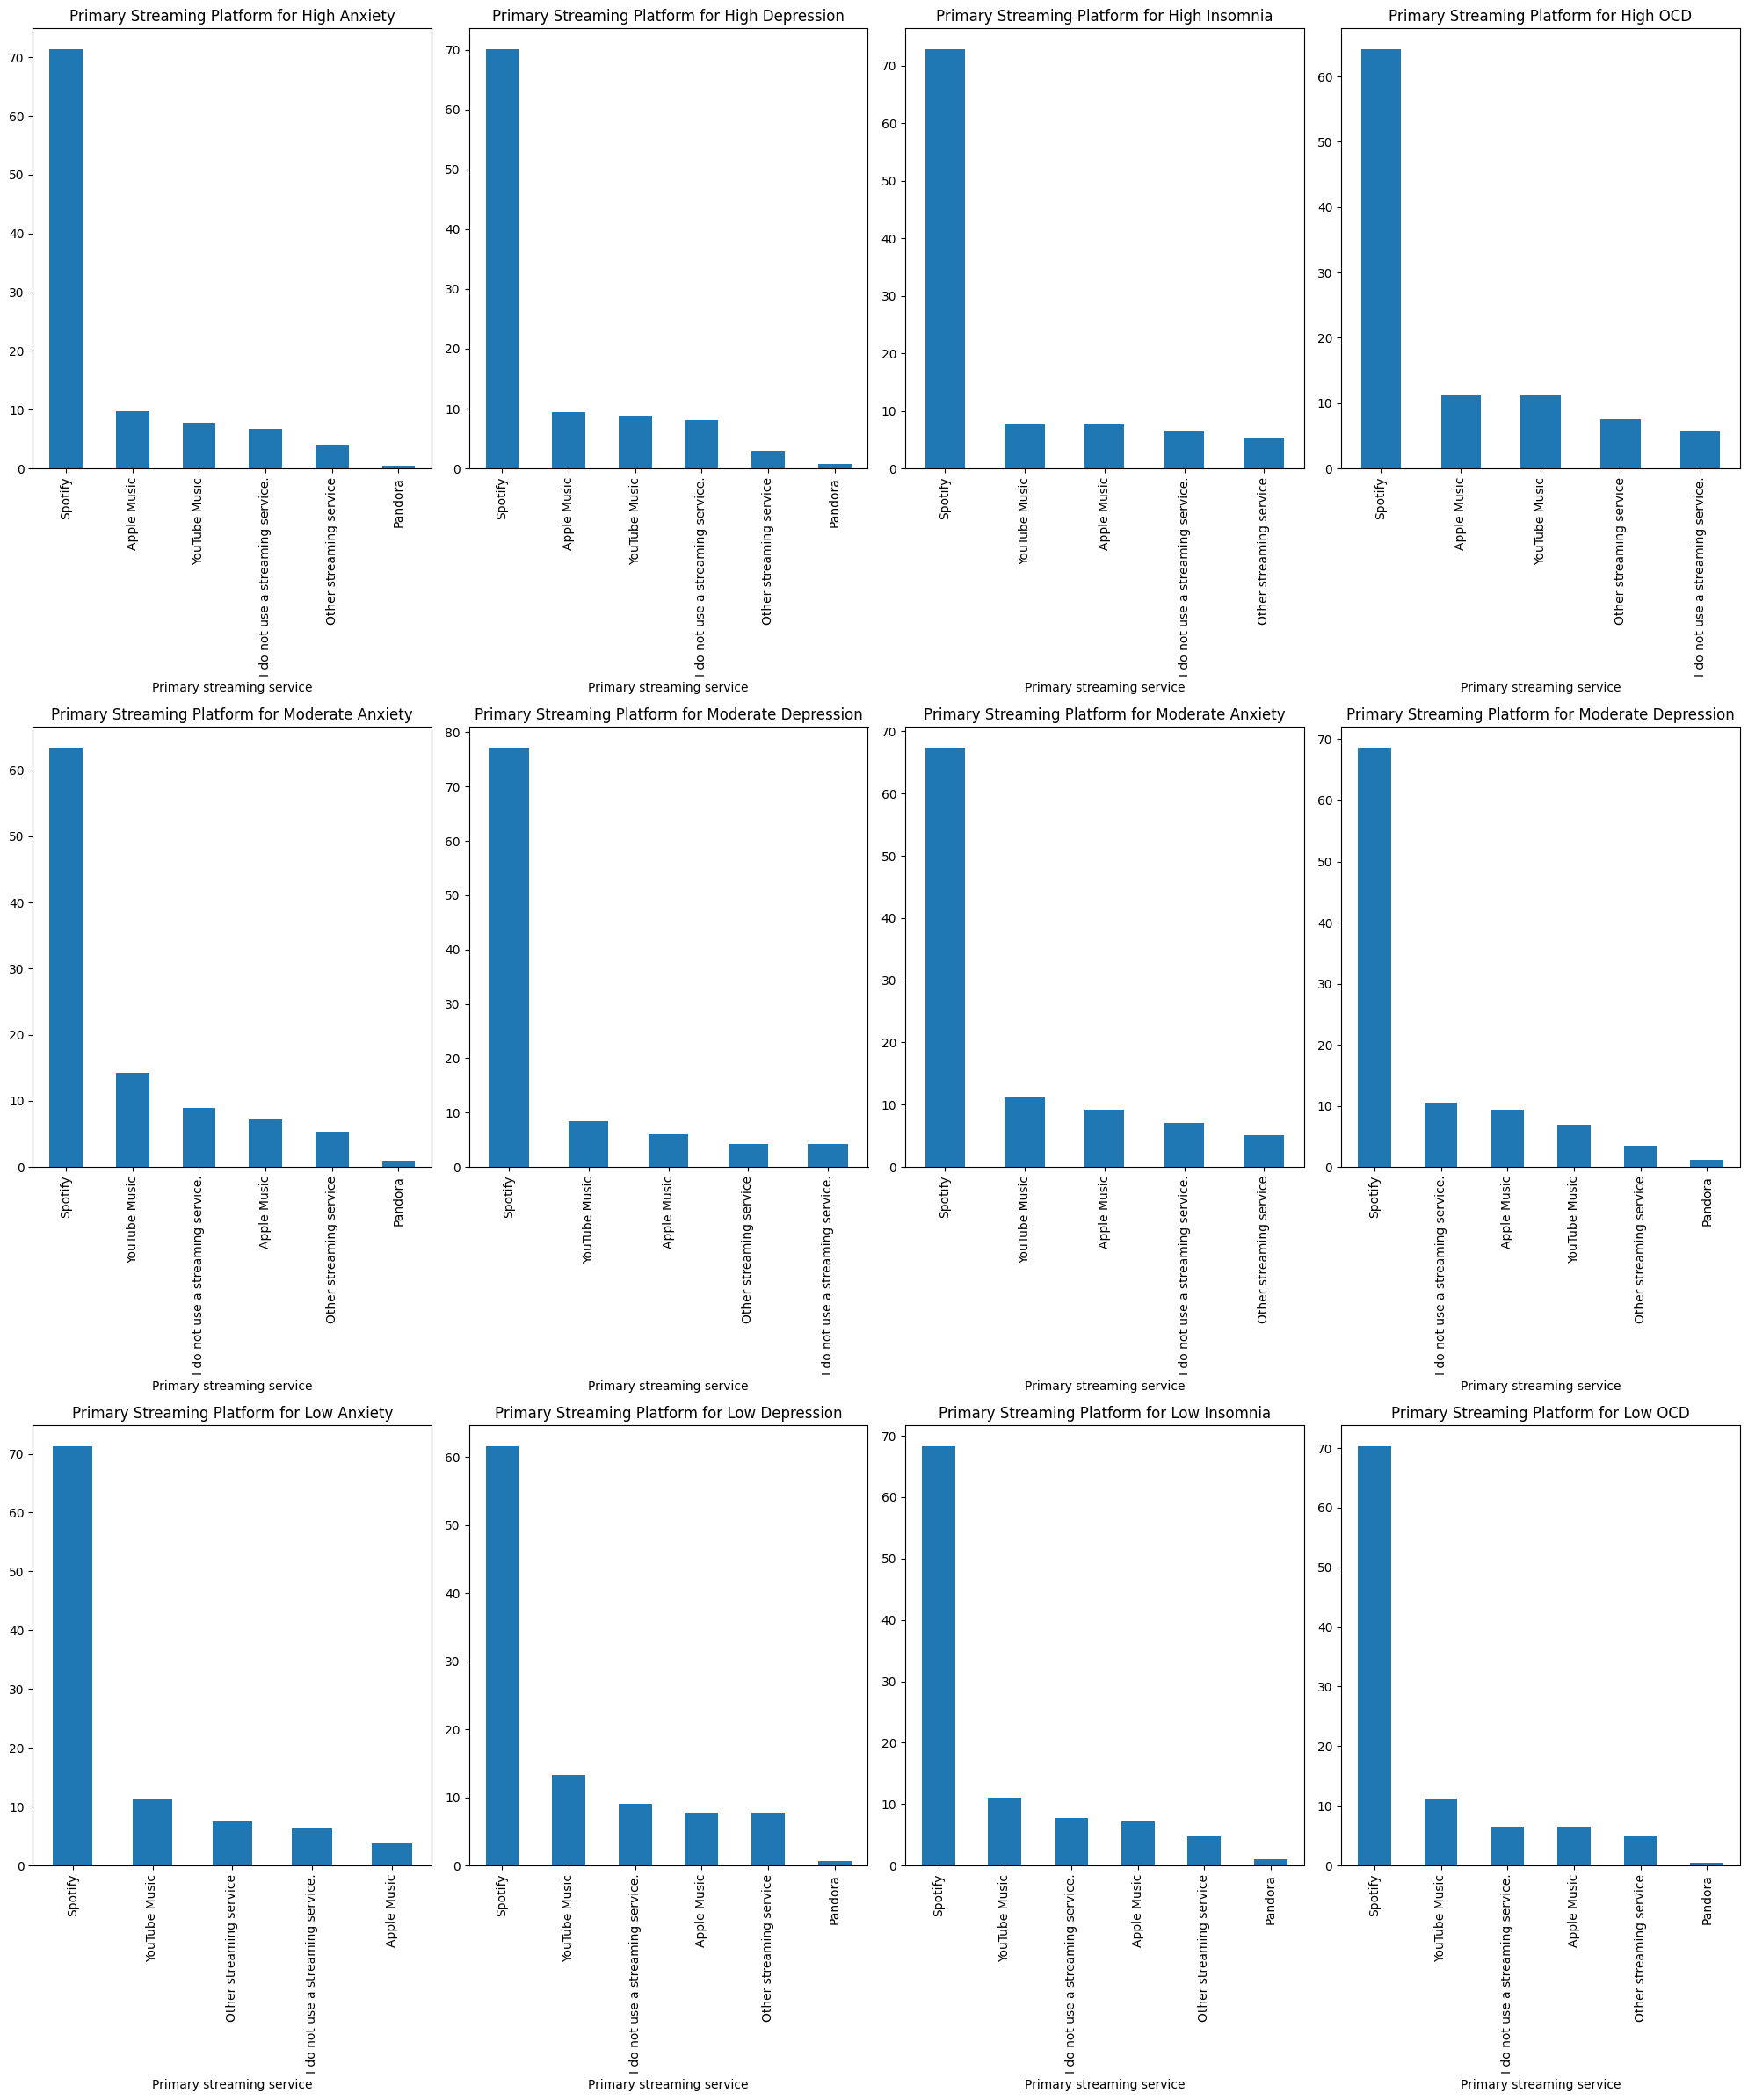

In [12]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 24))

# Plot for High Anxiety
ax1 = axes[0, 0]
(df[df['Anxiety_label'] == 'High']['Primary streaming service'].value_counts() / df[df['Anxiety_label'] == 'High'].shape[0] * 100).plot(kind='bar', ax=ax1)
ax1.set_title('Primary Streaming Platform for High Anxiety')

# Plot for High Depression
ax2 = axes[0, 1]
(df[df['Depression_label'] == 'High']['Primary streaming service'].value_counts() / df[df['Depression_label'] == 'High'].shape[0] * 100).plot(kind='bar', ax=ax2)
ax2.set_title('Primary Streaming Platform for High Depression')

# Plot for High Insomnia
ax3 = axes[0, 2]
(df[df['Insomnia_label'] == 'High']['Primary streaming service'].value_counts() / df[df['Insomnia_label'] == 'High'].shape[0] * 100).plot(kind='bar', ax=ax3)
ax3.set_title('Primary Streaming Platform for High Insomnia')

# Plot for High OCD
ax4 = axes[0, 3]
(df[df['OCD_label'] == 'High']['Primary streaming service'].value_counts() / df[df['OCD_label'] == 'High'].shape[0] * 100).plot(kind='bar', ax=ax4)
ax4.set_title('Primary Streaming Platform for High OCD')

# Plot for Moderate Anxiety
ax5 = axes[1, 0]
(df[df['Anxiety_label'] == 'Moderate']['Primary streaming service'].value_counts() / df[df['Anxiety_label'] == 'Moderate'].shape[0] * 100).plot(kind='bar', ax=ax5)
ax5.set_title('Primary Streaming Platform for Moderate Anxiety')

# Plot for Moderate Depression
ax6 = axes[1, 1]
(df[df['Depression_label'] == 'Moderate']['Primary streaming service'].value_counts() / df[df['Depression_label'] == 'Moderate'].shape[0] * 100).plot(kind='bar', ax=ax6)
ax6.set_title('Primary Streaming Platform for Moderate Depression')

ax7 = axes[1, 2]
(df[df['Insomnia_label'] == 'Moderate']['Primary streaming service'].value_counts() / df[df['Insomnia_label'] == 'Moderate'].shape[0] * 100).plot(kind='bar', ax=ax7)
ax7.set_title('Primary Streaming Platform for Moderate Anxiety')

# Plot for Moderate Depression
ax8 = axes[1, 3]
(df[df['OCD_label'] == 'Moderate']['Primary streaming service'].value_counts() / df[df['OCD_label'] == 'Moderate'].shape[0] * 100).plot(kind='bar', ax=ax8)
ax8.set_title('Primary Streaming Platform for Moderate Depression')

# Plot for Low Anxiety
ax9 = axes[2, 0]
(df[df['Anxiety_label'] == 'Low']['Primary streaming service'].value_counts() / df[df['Anxiety_label'] == 'Low'].shape[0] * 100).plot(kind='bar', ax=ax9)
ax9.set_title('Primary Streaming Platform for Low Anxiety')

# Plot for Low Depression
ax10 = axes[2, 1]
(df[df['Depression_label'] == 'Low']['Primary streaming service'].value_counts() / df[df['Depression_label'] == 'Low'].shape[0] * 100).plot(kind='bar', ax=ax10)
ax10.set_title('Primary Streaming Platform for Low Depression')

# Plot for Low Insomnia
ax11 = axes[2, 2]
(df[df['Insomnia_label'] == 'Low']['Primary streaming service'].value_counts() / df[df['Insomnia_label'] == 'Low'].shape[0] * 100).plot(kind='bar', ax=ax11)
ax11.set_title('Primary Streaming Platform for Low Insomnia')

# Plot for Low OCD
ax12 = axes[2, 3]
(df[df['OCD_label'] == 'Low']['Primary streaming service'].value_counts() / df[df['OCD_label'] == 'Low'].shape[0] * 100).plot(kind='bar', ax=ax12)
ax12.set_title('Primary Streaming Platform for Low OCD')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



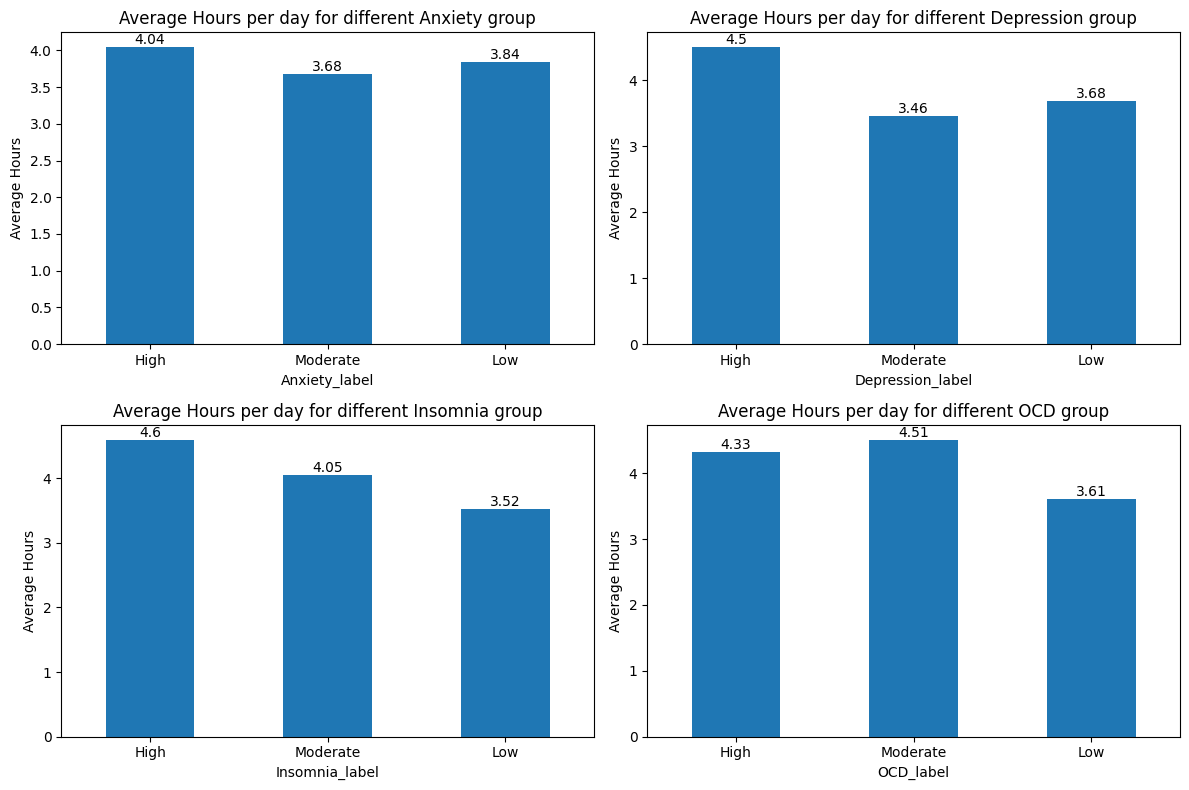

In [13]:
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define the order of the x-axis categories
order = ['High', 'Moderate', 'Low']

# Plot for Anxiety_label
ax1 = axes[0, 0]
mean_hours_anxiety = df.groupby('Anxiety_label')['Hours per day'].mean().loc[order]
mean_hours_anxiety.plot(kind='bar', ax=ax1)
ax1.set_title('Average Hours per day for different Anxiety group')
ax1.set_xlabel('Anxiety_label')
ax1.set_ylabel('Average Hours')

# Rotate the x-axis labels by 90 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Add value labels to the bars
for i, v in enumerate(mean_hours_anxiety):
    ax1.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Plot for Depression_label
ax2 = axes[0, 1]
mean_hours_depression = df.groupby('Depression_label')['Hours per day'].mean().loc[order]
mean_hours_depression.plot(kind='bar', ax=ax2)
ax2.set_title('Average Hours per day for different Depression group')
ax2.set_xlabel('Depression_label')
ax2.set_ylabel('Average Hours')

# Rotate the x-axis labels by 90 degrees
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Add value labels to the bars
for i, v in enumerate(mean_hours_depression):
    ax2.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Plot for Insomnia_label
ax3 = axes[1, 0]
mean_hours_insomnia = df.groupby('Insomnia_label')['Hours per day'].mean().loc[order]
mean_hours_insomnia.plot(kind='bar', ax=ax3)
ax3.set_title('Average Hours per day for different Insomnia group')
ax3.set_xlabel('Insomnia_label')
ax3.set_ylabel('Average Hours')

# Rotate the x-axis labels by 90 degrees
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

# Add value labels to the bars
for i, v in enumerate(mean_hours_insomnia):
    ax3.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Plot for OCD_label
ax4 = axes[1, 1]
mean_hours_ocd = df.groupby('OCD_label')['Hours per day'].mean().loc[order]
mean_hours_ocd.plot(kind='bar', ax=ax4)
ax4.set_title('Average Hours per day for different OCD group')
ax4.set_xlabel('OCD_label')
ax4.set_ylabel('Average Hours')

# Rotate the x-axis labels by 90 degrees
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)

# Add value labels to the bars
for i, v in enumerate(mean_hours_ocd):
    ax4.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/ty/y4xvm4r16qg653znp8pq00bw0000gn/T/ipykernel_49914/573433834.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[num_to_genre[i] for i in top3_genres.index], y=top3_genres / mean_preference.sum() * 100, palette=colors)


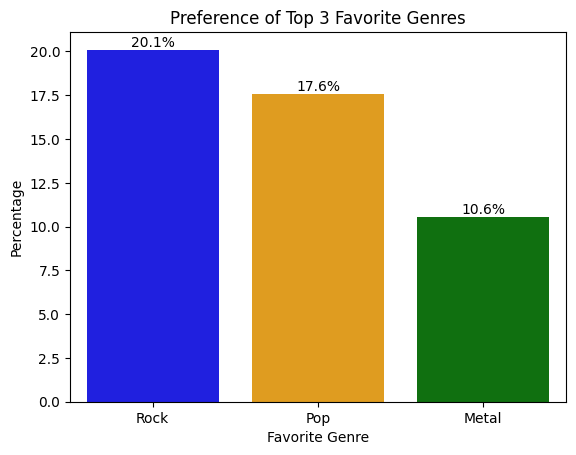

In [14]:
mean_preference = df.groupby('Fav genre')['Fav genre'].count()
top3_genres = mean_preference.nlargest(3)

# Plot the barplot
colors = ['blue', 'orange', 'green']

ax = sns.barplot(x=[num_to_genre[i] for i in top3_genres.index], y=top3_genres / mean_preference.sum() * 100, palette=colors)
plt.xlabel('Favorite Genre')
plt.ylabel('Percentage')
plt.title('Preference of Top 3 Favorite Genres')
plt.xticks(rotation=0)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


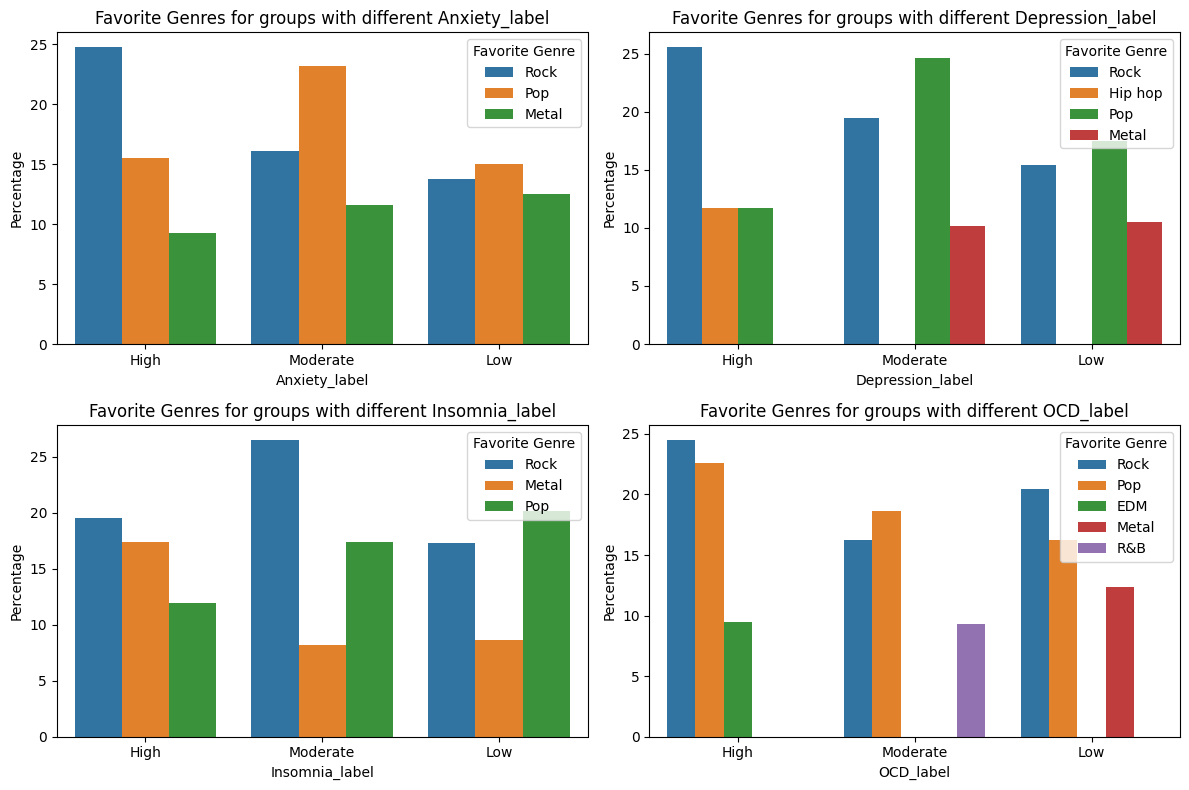

In [15]:
# Show the plot
plt.show()

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define the labels for each subplot
labels = ['Anxiety_label', 'Depression_label', 'Insomnia_label', 'OCD_label']

# Iterate over the labels and create subplots
for i, label in enumerate(labels):
    # Filter the data for the top-3 favorite genres
    top_genres = df[df[label].isin(['Low', 'Moderate', 'High'])].groupby([label, 'Fav genre']).size().reset_index(name='count')
    
    # Calculate the percentage for each label
    top_genres['percentage'] = top_genres['count'] / top_genres.groupby(label)['count'].transform('sum') * 100
    
    # Select the top-3 genres for each label
    top_genres = top_genres.groupby(label).apply(lambda x: x.nlargest(3, 'percentage')).reset_index(drop=True)
    
    # Replace the genre numbers with genre names
    top_genres['Fav genre'].replace(num_to_genre, inplace=True)
    
    # Plot the barplot
    ax = axes[i // 2, i % 2]
    sns.barplot(data=top_genres, x=label, y='percentage', hue='Fav genre', ax=ax, order=['High', 'Moderate', 'Low'])
    
    # Set the labels and title
    ax.set_xlabel(label)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Favorite Genres for groups with different {label}')
    ax.legend(title='Favorite Genre')

# Adjust the layout
plt.tight_layout()


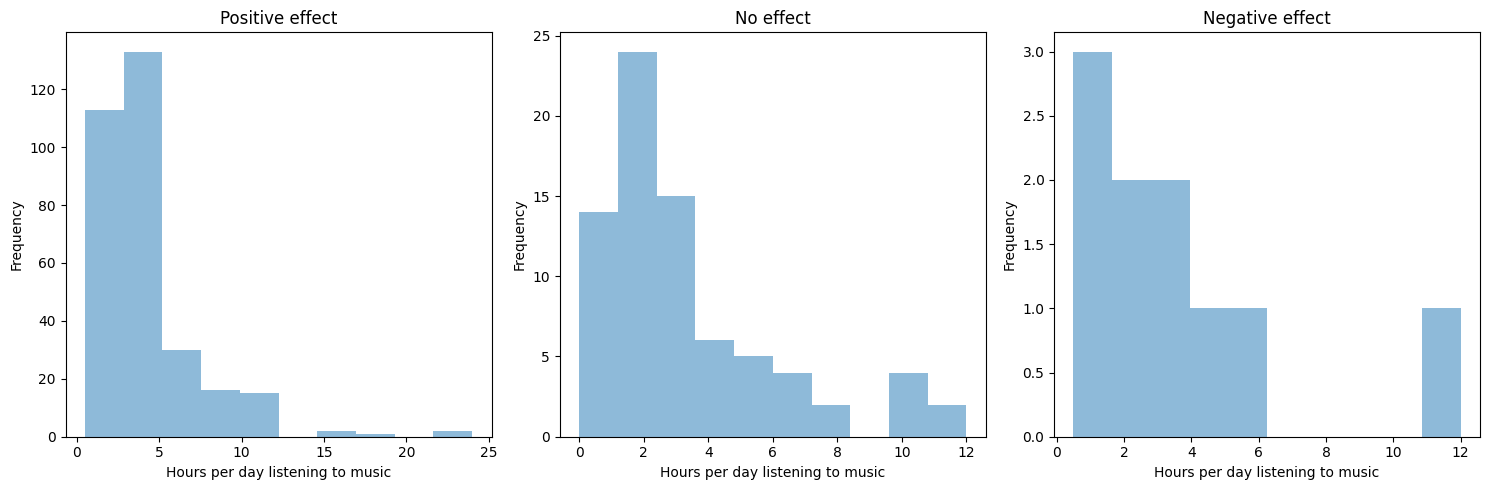

In [16]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the labels for each subplot
labels = [1, 0, -1]


# Iterate over the labels and create subplots
for i, label in enumerate(labels):
    # Filter the data based on the "Music effects" column
    filtered_data = df[df['Music effects'] == label]
    
    # Plot the histogram
    ax = axes[i]
    ax.hist(filtered_data['Hours per day'], bins=10, alpha=0.5)
    ax.set_xlabel('Hours per day listening to music')
    ax.set_ylabel('Frequency')
    title = "Positive effect" if label == 1 else "No effect" if label == 0 else "Negative effect"
    ax.set_title(f'{title}')
    
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


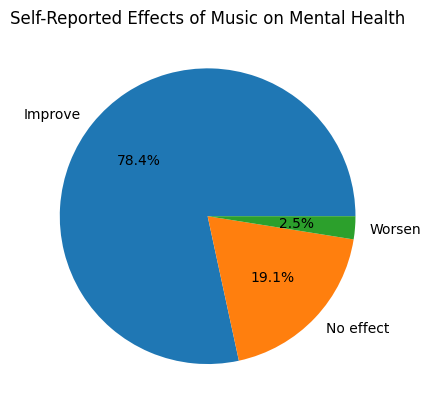

In [17]:
df_temp = df.copy()
df_temp['Music effects'] = df_temp['Music effects'].replace({-1: 'Worsen', 0: 'No effect', 1: 'Improve'})
df_temp['Music effects'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Self-Reported Effects of Music on Mental Health')
plt.ylabel('')
plt.show()


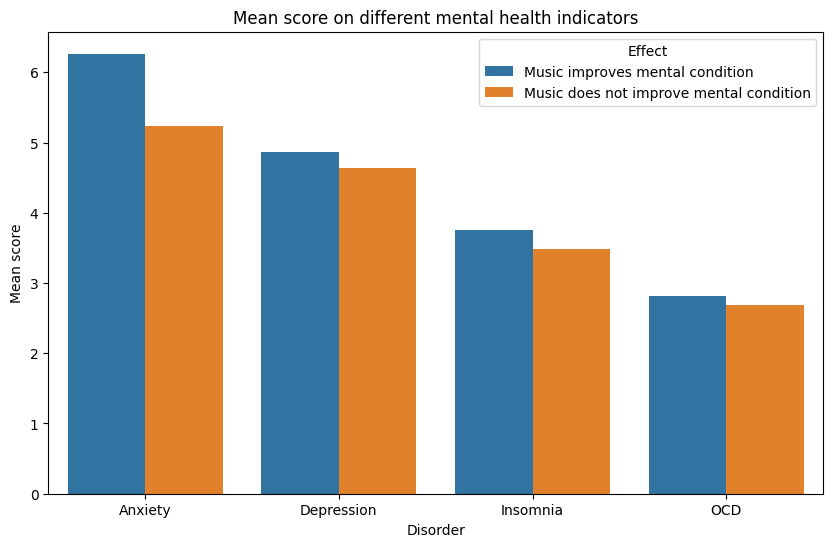

In [18]:
mean_of_no_effect = [
    df[df['Music effects']==0].describe().loc['mean']['Anxiety'],
    df[df['Music effects']==0].describe().loc['mean']['Depression'],
    df[df['Music effects']==0].describe().loc['mean']['Insomnia'],
    df[df['Music effects']==0].describe().loc['mean']['OCD']
]
mean_of_hv_effect = [
    df[df['Music effects']==1].describe().loc['mean']['Anxiety'],
    df[df['Music effects']==1].describe().loc['mean']['Depression'],
    df[df['Music effects']==1].describe().loc['mean']['Insomnia'],
    df[df['Music effects']==1].describe().loc['mean']['OCD']
]

mean_df = pd.DataFrame({
    'mean': [i for i in mean_of_hv_effect] + [i for i in mean_of_no_effect] ,
    'Disorder': ['Anxiety', 'Depression', 'Insomnia', 'OCD'] * 2,
    'Effect': ['Music improves mental condition'] * 4 + ['Music does not improve mental condition'] * 4
})
# Visualize the data using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_df, x='Disorder', y='mean', hue='Effect')
plt.title('Mean score on different mental health indicators')
plt.xlabel('Disorder')
plt.ylabel('Mean score')
plt.show()

In [19]:
df.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Anxiety_label', 'Depression_label', 'Insomnia_label',
       'OCD_label'],
      dtype='object')

In [20]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Age: [18. 21. 19. 16. 17. 15. 14. 20. 23. 22. 13. 10. 12.]
Primary streaming service: ['Spotify' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' 'Pandora']
Hours per day: [ 4.   5.   3.   1.   6.   8.   2.  12.  24.   7.   0.5 10.   2.5  0.7
  1.5 16.  15.   0.   9.  11.  18. ]
While working: [0 1]
Instrumentalist: [0 1]
Composer: [0 1]
Fav genre: [ 3  5  4  6  2  8  7  9 11 10 12 13 14 15 16  1]
Exploratory: [0 1]
Foreign languages: [1 0]
BPM: [1.32000000e+02 1.07000000e+02 8.60000000e+01 6.60000000e+01
 9.50000000e+01 9.40000000e+01 1.55000000e+02 1.25000000e+02
 8.80000000e+01 1.48000000e+02 1.03000000e+02 1.20000000e+02
 9.90000000e+01 1.18000000e+02 7.90000000e+01 8.40000000e+01
 1.69000000e+02 1.36000000e+02 1.01000000e+02 1.26000000e+02
 1.83000000e+02 1.42000000e+02 7.50000000e+01 8.90000000e+01
 1.61000000e+02 8.00000000e+01 1.30000000e+02 7.70000000e+01
 1.57000000e+02 9.00000000e+01 1.28000000e+02 1.40000000e+02
 9.60000000e+01 9.

In [21]:
df.drop('Permissions', axis=1, inplace=True)
df.replace({'Spotify': 1, 'YouTube Music': 2, 
            'Apple Music': 3, 'Pandora': 4,
            'Other streaming service': 5, 'I do not use a streaming service.': 6}, inplace=True)
df.replace({'High':3, 'Moderate':2, 'Low':1}, inplace=True)
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Age: [18. 21. 19. 16. 17. 15. 14. 20. 23. 22. 13. 10. 12.]
Primary streaming service: [1 2 6 3 5 4]
Hours per day: [ 4.   5.   3.   1.   6.   8.   2.  12.  24.   7.   0.5 10.   2.5  0.7
  1.5 16.  15.   0.   9.  11.  18. ]
While working: [0 1]
Instrumentalist: [0 1]
Composer: [0 1]
Fav genre: [ 3  5  4  6  2  8  7  9 11 10 12 13 14 15 16  1]
Exploratory: [0 1]
Foreign languages: [1 0]
BPM: [1.32000000e+02 1.07000000e+02 8.60000000e+01 6.60000000e+01
 9.50000000e+01 9.40000000e+01 1.55000000e+02 1.25000000e+02
 8.80000000e+01 1.48000000e+02 1.03000000e+02 1.20000000e+02
 9.90000000e+01 1.18000000e+02 7.90000000e+01 8.40000000e+01
 1.69000000e+02 1.36000000e+02 1.01000000e+02 1.26000000e+02
 1.83000000e+02 1.42000000e+02 7.50000000e+01 8.90000000e+01
 1.61000000e+02 8.00000000e+01 1.30000000e+02 7.70000000e+01
 1.57000000e+02 9.00000000e+01 1.28000000e+02 1.40000000e+02
 9.60000000e+01 9.10000000e+01 5.50000000e+01 8.50000000e+01
 1.60000000e+02 1.08000000e+02 1.56000000e+02 1.13000000e+

In [22]:
# Standardize non-categroical columns
# Convert "Primary streaming service" and "Fav genre" into one-hot encoded columns
from sklearn.preprocessing import StandardScaler
#print(f"Shape of df is {df.shape}")
df_temp = df.drop(columns = ['Anxiety_label', 'Depression_label', 'Insomnia_label','OCD_label'])
#print(f"Shape of df_temp is {df_temp.shape}")
fixed_columns = ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
unfixed_columns = [i for i in df_temp.columns if i not in fixed_columns]
scaler = StandardScaler()
df_temp[unfixed_columns] = scaler.fit_transform(df_temp[unfixed_columns])
#print(f"Shape after standarization: {df_temp.shape}")
# Remove outliers in df_scaled
for i in df_temp.drop(columns = fixed_columns).columns:
    df_temp = df_temp[~(df_temp[i].abs() > 5)]
#print(f"Shape after removing outliers: {df_temp.shape}")
p#rint(f'Columns before one-hot encoding: {df_temp.columns}')

#print(len(df_temp.columns))
df_temp = pd.get_dummies(df_temp, columns = ['Primary streaming service', 'Fav genre'], drop_first=True)

#print(f"Shape of df_temp after scaling and one-hot encoding is {df_temp.shape}")
#print(f'Columns after one-hot encoding: {df_temp.columns}')
#print(df_temp.isnull().sum())
#print(df_temp.columns)
#print(df_temp.head)


In [23]:
df_temp.columns

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Primary streaming service_2', 'Primary streaming service_3',
       'Primary streaming service_4', 'Primary streaming service_5',
       'Primary streaming service_6', 'Fav genre_2', 'Fav genre_3',
       'Fav genre_4', 'Fav genre_5', 'Fav genre_6', 'Fav genre_7',
       'Fav genre_8', 'Fav genre_9', 'Fav genre_10', 'Fav genre_11',
       'Fav genre_12', 'Fav genre_13', 'Fav genre_14', 'Fav genre_15',
       'Fav

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVC

# Predict the score of anxiety, depression, insomnia and OCD
models = [LinearRegression(), ElasticNet(), RandomForestRegressor(n_estimators = 100, max_depth=4, criterion = 'squared_error', random_state=0), MLPRegressor(learning_rate_init = 0.005, random_state=4, max_iter=400), xgb.XGBRegressor()]
model_name = ['Linear Regression', 'ElasticNet', 'Random Forest', 'Multi-Layer Perceptron', 'XGBoost']

# target = ['Anxiety_label', 'Depression_label', 'Insomnia_label', 'OCD_label']
target = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# X = df_scaled[['Age','Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'BPM','Music effects', 'Fav genre']]
X = df_temp.drop(columns = target)
scores = []
MAEs = []
# Change the feature name
for k in X.columns:
    X = X.rename(columns = {k:k.replace(' ', '_').replace('[','_').replace(']','_')})
for i in range(4):
    Y = df_temp.loc[:,target[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    temp_score = []
    temp_mae = []
    for j in range(5):
        model = models[j]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        temp_score.append(r2_score(y_test, y_pred, force_finite=False))
        temp_mae.append(mean_absolute_error(y_test, y_pred))
    scores.append(temp_score)
    MAEs.append(temp_mae)
print("\nR_sqaure of models for predicting each mental health disorder")
print(f"            {model_name}")
for i in range(4):
    print(f"{target[i]}: {scores[i]}")

print("\nMSE of models for predicting each mental health disorder")
print(f"            {model_name}")
for i in range(4):
    print(f"{target[i]}: {MAEs[i]}")
print("\n")
for j in range(4):
    best_index = scores[j].index(max(scores[j]))
    print(f"The best predicion model for {target[j]} is {model_name[best_index]} with R2 score of {scores[j][best_index]} and Mean Absolute Error of {MAEs[j][best_index]}")





R_sqaure of models for predicting each mental health disorder
            ['Linear Regression', 'ElasticNet', 'Random Forest', 'Multi-Layer Perceptron', 'XGBoost']
Anxiety: [-0.19229324496751787, -0.0022067546700812457, -0.04308474447688604, -1.105075824721526, -0.3465133345123428]
Depression: [0.07392589818471207, -0.07387509208748555, 0.0807774044903724, -0.555043347597542, -0.1604816755604639]
Insomnia: [-0.03355747815380927, -0.01115591077708955, -0.011961751442438384, -0.8118657761205363, -0.15143632818406516]
OCD: [-0.14381057370858974, -0.013587079541852898, -0.04285822298965414, -0.9612778929759982, -0.2832917260797727]

MSE of models for predicting each mental health disorder
            ['Linear Regression', 'ElasticNet', 'Random Forest', 'Multi-Layer Perceptron', 'XGBoost']
Anxiety: [2.2238990778869034, 2.037073385675372, 2.0462084055421235, 2.930775792598354, 2.340455058254773]
Depression: [2.217947840924917, 2.487613591262168, 2.2884388401944182, 2.834952106590888, 2.4911

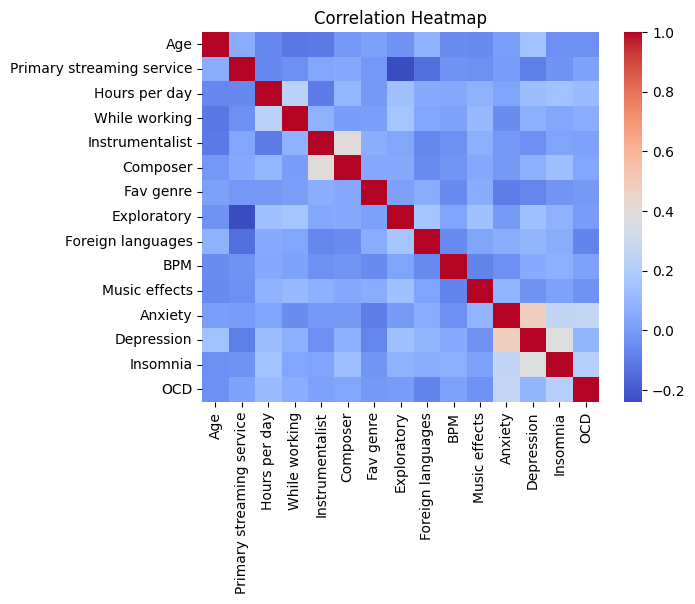

In [25]:
col = ['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 
       'Music effects', 'Anxiety', 'Depression', 'Insomnia', 'OCD',
       ]
sns.heatmap(df[col].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()